In [1]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data preparation

In [2]:
california_dataset = datasets.fetch_california_housing()

In [18]:
df = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)
df.insert(df.shape[1], 'Target', california_dataset.target, True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [22]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Heatmap to check correlations of features

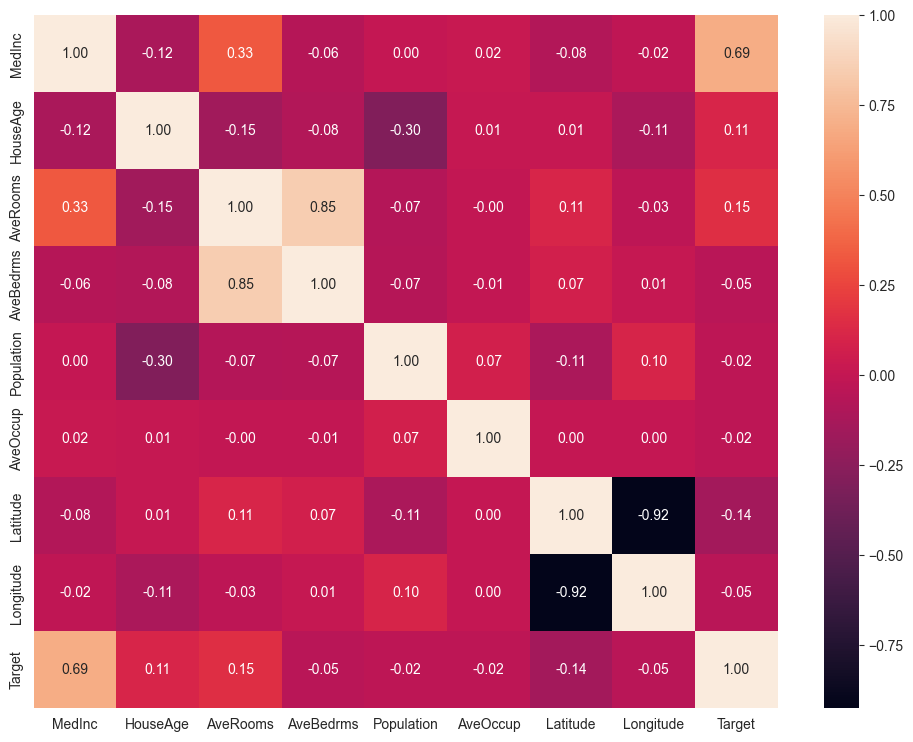

In [5]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), fmt=".2f", annot=True)
plt.show()

Feature engineering

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [8]:
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear model

In [10]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

linear_mse = mean_squared_error(y_test, model.predict(X_test))
linear_r2 = r2_score(y_test, model.predict(X_test))

print(f'Linear MSE: {linear_mse}')
print(f'Ridge R2: {linear_r2}')

Linear MSE: 0.5367808835096929
Ridge R2: 0.5904023810375134


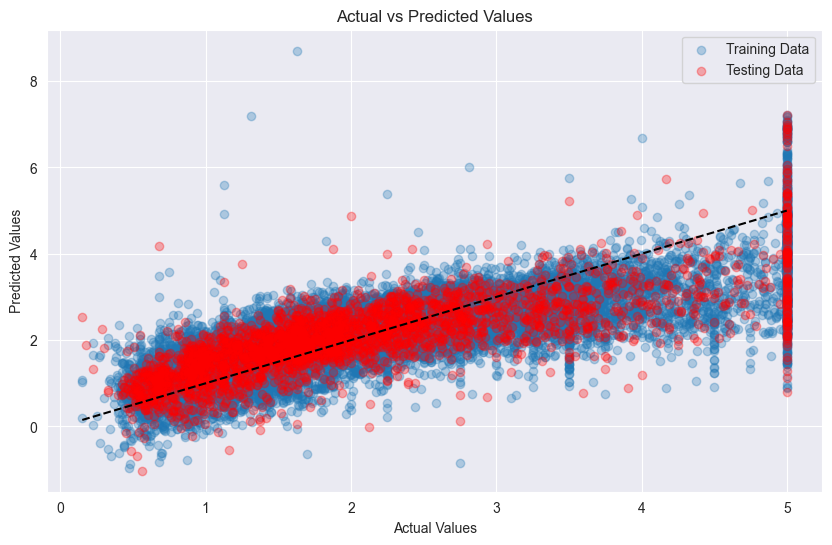

In [23]:
# Plotting predictions vs actual values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, model.predict(X_train), alpha=0.3, label='Training Data')
plt.scatter(y_test, model.predict(X_test), alpha=0.3, color='red', label='Testing Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [28]:
# Extract feature importances
coefficients = pd.DataFrame(model.coef_, df.iloc[:, :-1], columns=['Coefficient'])

# Plot the coefficients
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Feature Importance')
plt.show()

ValueError: Index data must be 1-dimensional

L2 Ridge model

In [11]:
alpha = 2
ridge_model = linear_model.Ridge(alpha)
ridge_model.fit(X_train, y_train)

ridge_mse = mean_squared_error(y_test, ridge_model.predict(X_test))
ridge_r2 = r2_score(y_test, ridge_model.predict(X_test))

print(f'Ridge MSE: {ridge_mse}')
print(f'Ridge R2: {ridge_r2}')

Ridge MSE: 0.5367698634358157
Ridge R2: 0.5904107900478927


XGBoost Linear Regressor model

In [12]:
xg_model = XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=1000, learning_rate=0.1)
xg_model.fit(X_train, y_train)

xg_mse = mean_squared_error(y_test, xg_model.predict(X_test))
xg_r2 = r2_score(y_test, xg_model.predict(X_test))

print(f'XGB MSE: {xg_mse}')
print(f'XGB R2: {xg_r2}')

XGB MSE: 0.19974858323383557
XGB R2: 0.8475792514279586


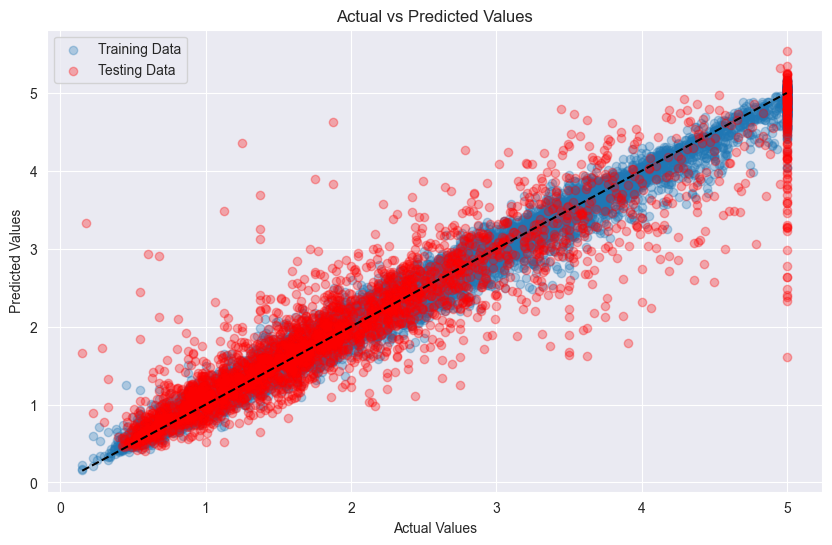

In [29]:
# Plotting predictions vs actual values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, xg_model.predict(X_train), alpha=0.3, label='Training Data')
plt.scatter(y_test, xg_model.predict(X_test), alpha=0.3, color='red', label='Testing Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

SVR model

In [13]:
svr = SVR(C=5.0, epsilon=.2)
svr.fit(X_train, y_train)

print('SVR MSE: ', mean_squared_error(y_test, svr.predict(X_test)))
print('SVR R2: ',r2_score(y_test, svr.predict(X_test))) 

SVR MSE:  0.3261496863985579
SVR R2:  0.7511272493522048
